In [1]:
import pandas as pd
from datetime import datetime
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Load observation data and create subset of data based on CODE and VALUE

In [2]:
observations_df = pd.read_csv('C:\\Projects\\healthdata\\train\\observations.csv')

In [3]:
observations_df.shape

(20656425, 8)

In [4]:
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20656425 entries, 0 to 20656424
Data columns (total 8 columns):
DATE           object
PATIENT        object
ENCOUNTER      object
CODE           object
DESCRIPTION    object
VALUE          object
UNITS          object
TYPE           object
dtypes: object(8)
memory usage: 1.2+ GB


In [5]:
groupby_code = observations_df.groupby(['CODE', 'DESCRIPTION'])['DATE'].count()
pd.set_option('display.max_rows', 236)
print(groupby_code)

CODE       DESCRIPTION                                                                                         
10230-1    Left ventricular Ejection fraction                                                                       11206
10480-2    Estrogen+Progesterone receptor Ag [Presence] in Tissue by Immune stain                                      94
10834-0    Globulin                                                                                                    50
           Globulin [Mass/volume] in Serum by calculation                                                           62764
14804-9    Lactate dehydrogenase [Enzymatic activity/volume] in Serum or Plasma by Lactate to pyruvate reaction    141353
14959-1    Microalbumin Creatinine Ratio                                                                           130466
1742-6     ALT (Elevated)                                                                                              50
           Alanine aminotransferas

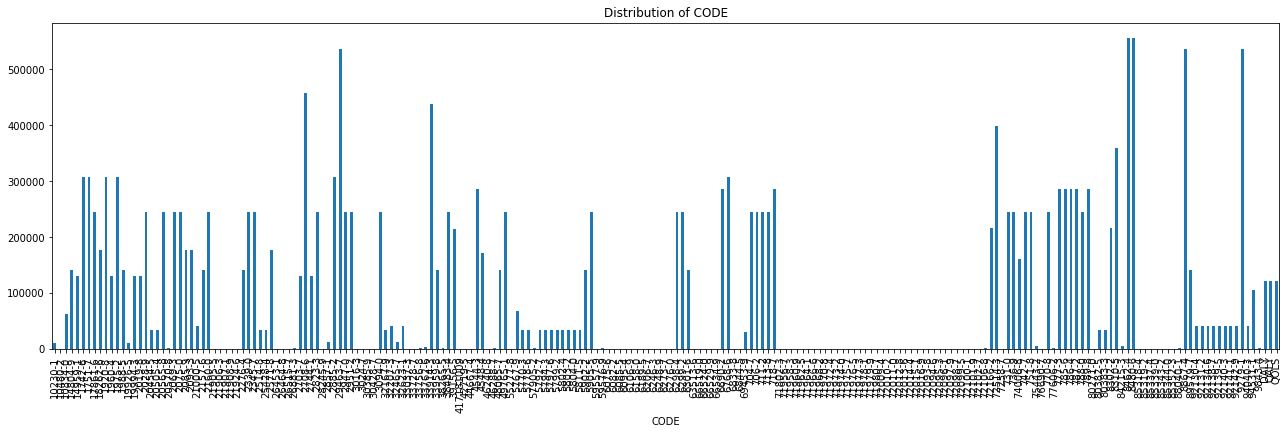

In [6]:
observations_df = observations_df.sort_values(by='CODE')
groupby_code = observations_df.groupby('CODE').size()
groupby_code_patient = observations_df.groupby(['CODE'])['PATIENT'].count().fillna(0)
groupby_code_patient.plot.bar(y = 'CODE', title = "Distribution of CODE", figsize = (22, 6))

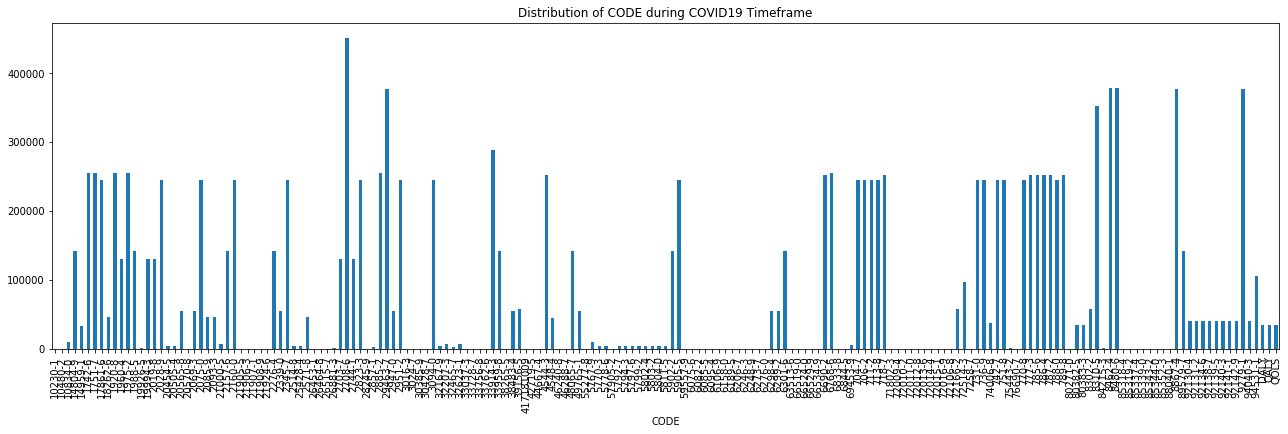

In [7]:
# Plotting the frequency of codes based on date
observations_covid19 = observations_df[(observations_df['DATE'] >= '2020-01-01') & (observations_df['DATE'] <= '2020-06-20')]
groupby_code = observations_covid19.groupby('CODE').size() # builder design pattern
groupby_code.plot.bar(y = 'CODE', title = 'Distribution of CODE during COVID19 Timeframe', figsize = (22,6))

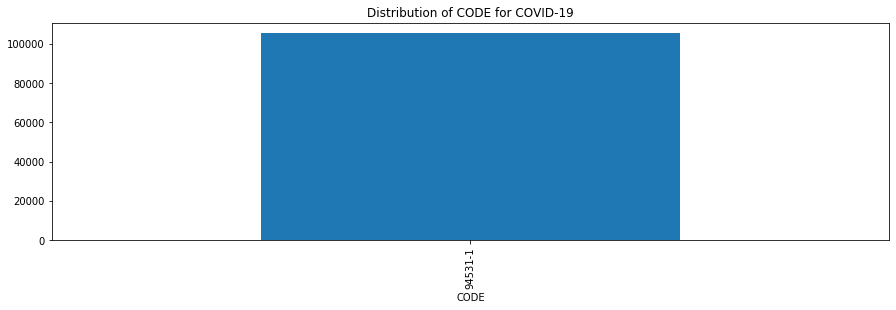

In [8]:
# Plotting the frequency of codes based on CODE = '94531-1'
observations_covid19 = observations_df[(observations_df['CODE'] == '94531-1')]
groupby_code = observations_covid19.groupby('CODE').size() # builder design pattern
groupby_code.plot.bar(y = 'CODE', title = 'Distribution of CODE for COVID-19', figsize = (15,4))

### Create subset of data based on CODE = '94531-1' 

In [9]:
covid19_status_df = observations_df.loc[(observations_df['CODE'] == '94531-1')]

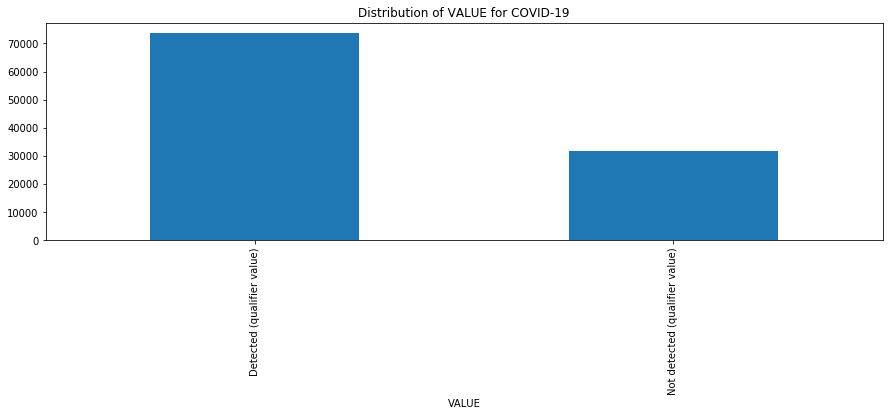

In [10]:
# Plotting the frequency of VALUE
covid19_value_df = covid19_status_df.sort_values(by='VALUE')
groupby_value = covid19_value_df.groupby('VALUE').size() # builder design pattern
groupby_value.plot.bar(y = 'VALUE', title = 'Distribution of VALUE for COVID-19', figsize = (15,4))

### Create subset of data based on CODE = '94531-1' and VALUE = 'Detected'

In [11]:
covid19_status2_df = observations_df.loc[(observations_df['CODE'] == '94531-1') & (observations_df['VALUE'].str.contains('Detected'))]

In [12]:
covid19_status_df.shape

(105548, 8)

In [13]:
covid19_status2_df.shape

(73697, 8)

# Load patient data and create subset of data that only includes COVID-19 patients.

In [14]:
patients_df = pd.read_csv('C:\\Projects\\healthdata\\train\\patients.csv')

In [15]:
patients_df.shape

(117959, 25)

In [16]:
patients_subset_df = pd.DataFrame([patients_df.Id, patients_df.BIRTHDATE, patients_df.DEATHDATE, patients_df.MARITAL, patients_df.RACE, patients_df.ETHNICITY, patients_df.GENDER, patients_df.CITY, patients_df.STATE]).transpose()

In [17]:
covid19_patients_df = patients_subset_df.loc[(patients_subset_df['Id'].isin(covid19_status2_df['PATIENT']))]

In [18]:
covid19_patients_df.shape

(73697, 9)

In [19]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73697 entries, 3 to 117956
Data columns (total 9 columns):
Id           73697 non-null object
BIRTHDATE    73697 non-null object
DEATHDATE    5568 non-null object
MARITAL      67360 non-null object
RACE         73697 non-null object
ETHNICITY    73697 non-null object
GENDER       73697 non-null object
CITY         73697 non-null object
STATE        73697 non-null object
dtypes: object(9)
memory usage: 5.6+ MB


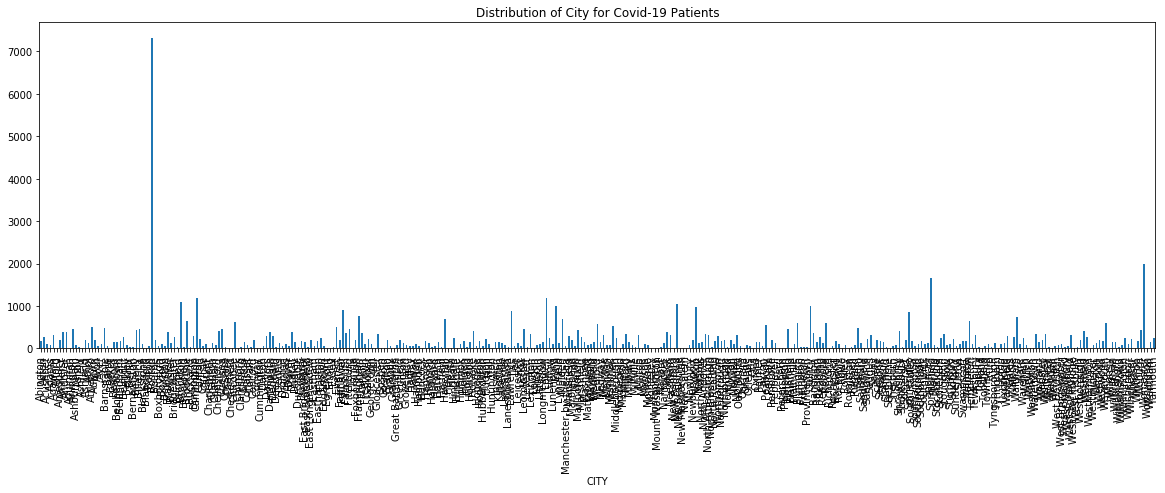

In [20]:
covid19_city_df = covid19_patients_df.sort_values(by='CITY')
# groupby_code = observations_df.groupby('CODE').size()
groupby_city_patient = covid19_city_df.groupby(['CITY'])['Id'].count()
groupby_city_patient.plot.bar(y = 'CITY', title = "Distribution of City for Covid-19 Patients", figsize = (20, 6))

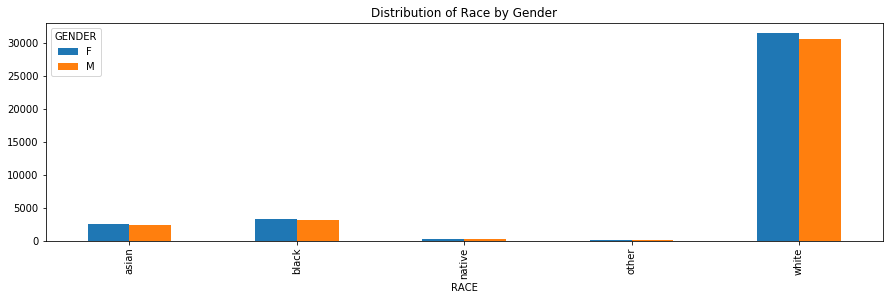

In [21]:
covid19_patient_data = covid19_patients_df.sort_values(by='RACE')
groupby_race = covid19_patient_data.groupby('RACE').size()
groupby_race_gender = covid19_patient_data.groupby(['RACE', 'GENDER'])['RACE'].count().unstack('GENDER').fillna(0)
groupby_race_gender.plot.bar(title = "Distribution of Race by Gender", figsize = (15, 4))

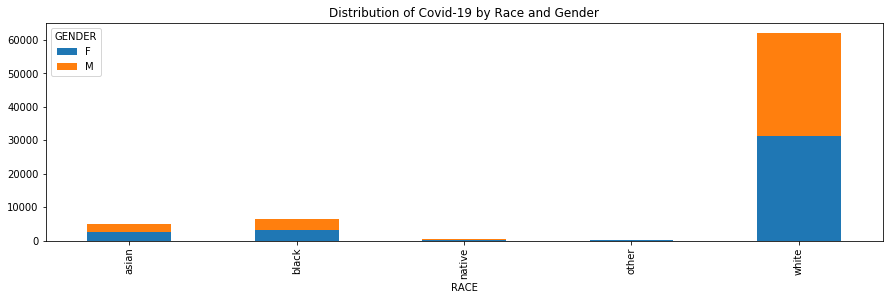

In [22]:
groupby_race_gender[['F', 'M']].plot.bar(title = 'Distribution of Covid-19 by Race and Gender', stacked=True, figsize=(15,4))

### Add column to covid19_patients_df to track patients who survived: '1' = survived, '0' = died

In [23]:
covid19_patients_df["SURVIVAL"] = covid19_patients_df["DEATHDATE"].apply(lambda x: "1" if pd.isnull(x) else "0")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73697 entries, 3 to 117956
Data columns (total 10 columns):
Id           73697 non-null object
BIRTHDATE    73697 non-null object
DEATHDATE    5568 non-null object
MARITAL      67360 non-null object
RACE         73697 non-null object
ETHNICITY    73697 non-null object
GENDER       73697 non-null object
CITY         73697 non-null object
STATE        73697 non-null object
SURVIVAL     73697 non-null object
dtypes: object(10)
memory usage: 6.2+ MB


# Calculate Age for each patient, use DEATHDATE if not null, else use today's date.

In [25]:
# patients_age = covid19_patients_df['DEATHDATE'] - covid19_patients_df['BIRTHDATE']
# covid19_patients_df.insert(3, 'AGE', (covid19_patients_df['DEATHDATE'] - covid19_hosp_subset_df['BIRTHDATE']))

def calculate_age(born, death):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    if pd.isnull(death):
        today = date.today()
    else:        
        today = datetime.strptime(death, "%Y-%m-%d").date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

covid19_patients_df['AGE'] = covid19_patients_df.apply(lambda x: calculate_age(x.BIRTHDATE, x.DEATHDATE), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [26]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73697 entries, 3 to 117956
Data columns (total 11 columns):
Id           73697 non-null object
BIRTHDATE    73697 non-null object
DEATHDATE    5568 non-null object
MARITAL      67360 non-null object
RACE         73697 non-null object
ETHNICITY    73697 non-null object
GENDER       73697 non-null object
CITY         73697 non-null object
STATE        73697 non-null object
SURVIVAL     73697 non-null object
AGE          73697 non-null int64
dtypes: int64(1), object(10)
memory usage: 6.7+ MB


In [27]:
covid19_patients_df.head()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,SURVIVAL,AGE
3,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,NaN,M,white,nonhispanic,F,Wakefield,Massachusetts,1,42
4,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,NaN,S,white,nonhispanic,M,Weston,Massachusetts,1,30
5,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,NaN,M,white,nonhispanic,F,Millville,Massachusetts,1,36
6,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,NaN,NaN,black,nonhispanic,M,Boston,Massachusetts,1,24
7,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,NaN,M,white,hispanic,F,Boston,Massachusetts,1,60


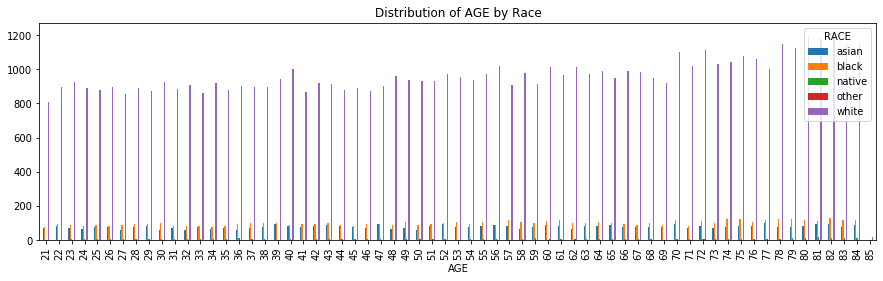

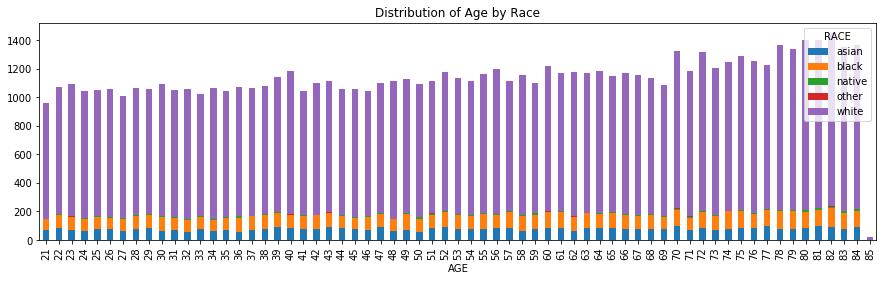

In [28]:
covid19_patient_age_data = covid19_patients_df.sort_values(by='AGE')
groupby_age = covid19_patient_age_data.groupby('AGE').size()
groupby_age_race = covid19_patient_age_data.groupby(['AGE', 'RACE'])['AGE'].count().unstack('RACE').fillna(0)
groupby_age_race.plot.bar(title = "Distribution of AGE by Race", figsize = (15, 4))
groupby_age_race[['asian', 'black', 'native', 'other' ,'white']].plot.bar(title = 'Distribution of Age by Race', stacked=True, figsize=(15,4))

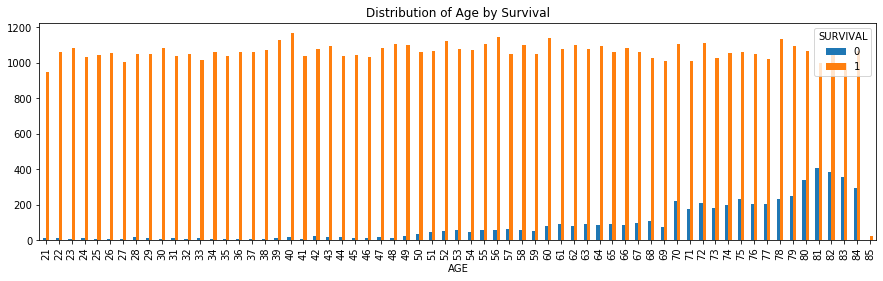

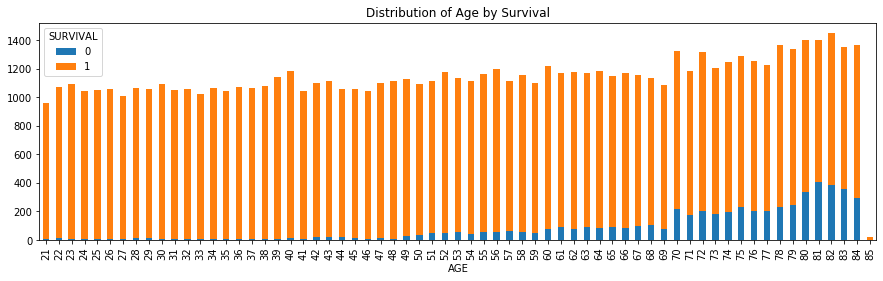

In [29]:
covid19_patient_age_data = covid19_patients_df.sort_values(by='AGE')
# roupby_age = covid19_patient_age_data.groupby('AGE').size()
groupby_age_survival = covid19_patient_age_data.groupby(['AGE', 'SURVIVAL'])['AGE'].count().unstack('SURVIVAL').fillna(0)
groupby_age_survival.plot.bar(title = "Distribution of Age by Survival", figsize = (15, 4))
groupby_age_survival[['0', '1']].plot.bar(title = 'Distribution of Age by Survival', stacked=True, figsize=(15,4))

# Load Encounters Date: Contains Hospitalizations

In [30]:
encounters_df = pd.read_csv('C:\\Projects\\healthdata\\train\\encounters.csv')

### Create DataFrame with only COVID-19 hospitalizations.

In [31]:
covid19_hosp_df = encounters_df.loc[(encounters_df['REASONCODE'] == 840539006)] 

### Create a subset DataFrame that only contains the following columns: Id, START, STOP, PATIENT, CODE, DESCRIPTION, REASONCODE, REASONDESCRIPTION.

In [32]:
covid19_hosp_subset_df = pd.DataFrame([covid19_hosp_df.Id, covid19_hosp_df.START, covid19_hosp_df.STOP, covid19_hosp_df.PATIENT, covid19_hosp_df.CODE, covid19_hosp_df.DESCRIPTION, covid19_hosp_df.REASONCODE, covid19_hosp_df.REASONDESCRIPTION]).transpose()

In [33]:
covid19_hosp_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31883 entries, 74 to 6022721
Data columns (total 8 columns):
Id                   31883 non-null object
START                31883 non-null object
STOP                 31883 non-null object
PATIENT              31883 non-null object
CODE                 31883 non-null object
DESCRIPTION          31883 non-null object
REASONCODE           31883 non-null object
REASONDESCRIPTION    31883 non-null object
dtypes: object(8)
memory usage: 3.4+ MB


### Insert column containing number of days hospitalized into the COVID-19 hospital dataframe.

In [34]:
covid19_hosp_subset_df['START'] = pd.to_datetime(covid19_hosp_subset_df['START'])
covid19_hosp_subset_df['STOP'] = pd.to_datetime(covid19_hosp_subset_df['STOP'])

In [35]:
covid19_hosp_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31883 entries, 74 to 6022721
Data columns (total 8 columns):
Id                   31883 non-null object
START                31883 non-null datetime64[ns, UTC]
STOP                 31883 non-null datetime64[ns, UTC]
PATIENT              31883 non-null object
CODE                 31883 non-null object
DESCRIPTION          31883 non-null object
REASONCODE           31883 non-null object
REASONDESCRIPTION    31883 non-null object
dtypes: datetime64[ns, UTC](2), object(6)
memory usage: 3.4+ MB


In [36]:
covid19_hosp_subset_df.insert(3, 'DAYSHOSPITALIZED', (covid19_hosp_subset_df['STOP'] - covid19_hosp_subset_df['START']))

In [37]:
covid19_hosp_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31883 entries, 74 to 6022721
Data columns (total 9 columns):
Id                   31883 non-null object
START                31883 non-null datetime64[ns, UTC]
STOP                 31883 non-null datetime64[ns, UTC]
DAYSHOSPITALIZED     31883 non-null timedelta64[ns]
PATIENT              31883 non-null object
CODE                 31883 non-null object
DESCRIPTION          31883 non-null object
REASONCODE           31883 non-null object
REASONDESCRIPTION    31883 non-null object
dtypes: datetime64[ns, UTC](2), object(6), timedelta64[ns](1)
memory usage: 3.7+ MB


In [38]:
covid19_hosp_subset_df.head()

,Id,START,STOP,DAYSHOSPITALIZED,PATIENT,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
74,e6ad9f78-fa0e-431a-b9b6-5d127a594261,2020-02-24 03:13:21+00:00,2020-03-12 10:30:21+00:00,17 days 07:17:00,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1505002,Hospital admission for isolation (procedure),8.40539e+08,COVID-19
115,d068a77c-abcf-4c5e-a8b9-e74cbdbfe099,2020-03-03 10:58:09+00:00,2020-03-23 18:45:09+00:00,20 days 07:47:00,90031c21-e8a4-416e-b60b-23e871ee62dc,1505002,Hospital admission for isolation (procedure),8.40539e+08,COVID-19
295,b75fd86e-0f14-48aa-ab7e-509556f9bacc,2020-03-05 01:17:07+00:00,2020-03-09 04:14:07+00:00,4 days 02:57:00,c58ae02e-235e-4db2-a9c3-6926e9c0c5fa,1505002,Hospital admission for isolation (procedure),8.40539e+08,COVID-19
296,58c7f39a-0c0a-4d40-8855-5f80a982ab41,2020-03-09 01:17:07+00:00,2020-03-16 04:22:07+00:00,7 days 03:05:00,c58ae02e-235e-4db2-a9c3-6926e9c0c5fa,305351004,Admission to intensive care unit (procedure),8.40539e+08,COVID-19
297,7fd840a0-3090-4163-8c52-1f412c00c0bc,2020-03-28 00:27:07+00:00,2020-03-28 00:42:07+00:00,0 days 00:15:00,c58ae02e-235e-4db2-a9c3-6926e9c0c5fa,308646001,Death Certification,8.40539e+08,COVID-19


## Adding DAYSHOSPITALIZED to COVID-19 patients dataframe

In [39]:
covid19_patients_df = pd.merge(covid19_patients_df, covid19_hosp_subset_df[['DAYSHOSPITALIZED', 'PATIENT']], how='left', left_on='Id', right_on='PATIENT')
covid19_patients_df.drop(columns='PATIENT', inplace = True)

In [40]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 12 columns):
Id                  85160 non-null object
BIRTHDATE           85160 non-null object
DEATHDATE           14687 non-null object
MARITAL             78556 non-null object
RACE                85160 non-null object
ETHNICITY           85160 non-null object
GENDER              85160 non-null object
CITY                85160 non-null object
STATE               85160 non-null object
SURVIVAL            85160 non-null object
AGE                 85160 non-null int64
DAYSHOSPITALIZED    31865 non-null timedelta64[ns]
dtypes: int64(1), object(10), timedelta64[ns](1)
memory usage: 8.4+ MB


In [41]:
covid19_patients_df['DAYSHOSPITALIZED'] = pd.to_numeric(covid19_patients_df['DAYSHOSPITALIZED'].dt.days, downcast='integer')
# covid19_patients_df['DAYSHOSPITALIZED'] = covid19_patients_df['DAYSHOSPITALIZED'].dt.days.astype('int16')

In [42]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 12 columns):
Id                  85160 non-null object
BIRTHDATE           85160 non-null object
DEATHDATE           14687 non-null object
MARITAL             78556 non-null object
RACE                85160 non-null object
ETHNICITY           85160 non-null object
GENDER              85160 non-null object
CITY                85160 non-null object
STATE               85160 non-null object
SURVIVAL            85160 non-null object
AGE                 85160 non-null int64
DAYSHOSPITALIZED    31865 non-null float64
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ MB


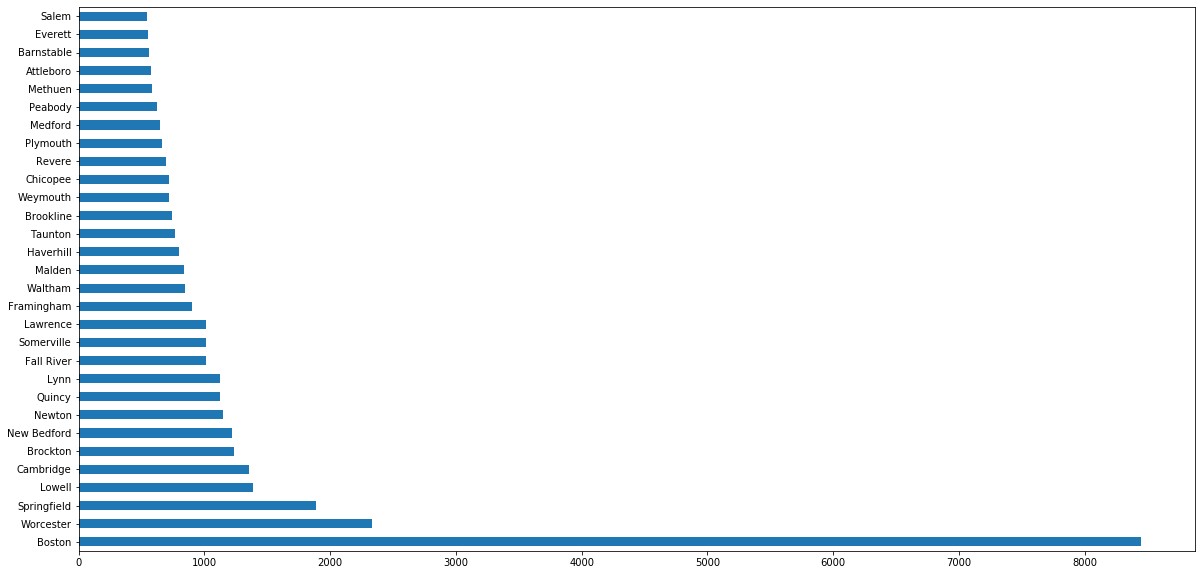

In [43]:
covid19_patients_df['CITY'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

In [44]:
covid19_patients_df['SURVIVAL'] = pd.to_numeric(covid19_patients_df['SURVIVAL'], downcast='integer')

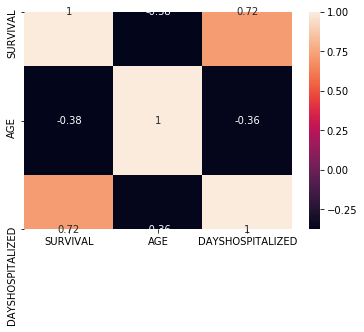

In [45]:
sns.heatmap(covid19_patients_df.corr(),annot=True)

In [46]:
covid19_patients_df.head()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,SURVIVAL,AGE,DAYSHOSPITALIZED
0,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,NaN,M,white,nonhispanic,F,Wakefield,Massachusetts,1,42,NaN
1,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,NaN,S,white,nonhispanic,M,Weston,Massachusetts,1,30,17.0
2,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,NaN,M,white,nonhispanic,F,Millville,Massachusetts,1,36,20.0
3,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,NaN,NaN,black,nonhispanic,M,Boston,Massachusetts,1,24,NaN
4,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,NaN,M,white,hispanic,F,Boston,Massachusetts,1,60,NaN


In [47]:
covid19_patients_df['DAYSHOSPITALIZED'] = covid19_patients_df['DAYSHOSPITALIZED'].fillna(0)

In [48]:
covid19_patients_df.head()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,SURVIVAL,AGE,DAYSHOSPITALIZED
0,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,NaN,M,white,nonhispanic,F,Wakefield,Massachusetts,1,42,0.0
1,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,NaN,S,white,nonhispanic,M,Weston,Massachusetts,1,30,17.0
2,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,NaN,M,white,nonhispanic,F,Millville,Massachusetts,1,36,20.0
3,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,NaN,NaN,black,nonhispanic,M,Boston,Massachusetts,1,24,0.0
4,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,NaN,M,white,hispanic,F,Boston,Massachusetts,1,60,0.0


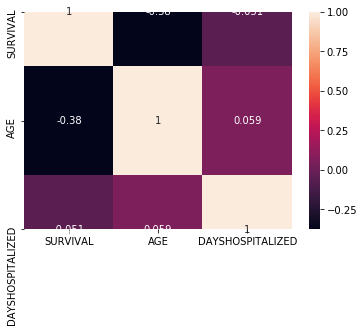

In [49]:
sns.heatmap(covid19_patients_df.corr(),annot=True)

# Conditions Data: Contains other conditions a patient might have.

In [50]:
conditions_df = pd.read_csv('C:\\Projects\\healthdata\\train\\conditions.csv')

In [51]:
conditions_df.shape

(1362601, 6)

In [52]:
conditions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362601 entries, 0 to 1362600
Data columns (total 6 columns):
START          1362601 non-null object
STOP           529042 non-null object
PATIENT        1362601 non-null object
ENCOUNTER      1362601 non-null object
CODE           1362601 non-null int64
DESCRIPTION    1362601 non-null object
dtypes: int64(1), object(5)
memory usage: 62.4+ MB


In [53]:
groupby_conditions_code = conditions_df.groupby(['CODE', 'DESCRIPTION'])['PATIENT'].count()
pd.set_option('display.max_rows', 236)
print(groupby_conditions_code)

CODE             DESCRIPTION                                                                     
1734006          Fracture of the vertebral column with spinal cord injury                              123
5602001          Opioid abuse (disorder)                                                             10924
6072007          Bleeding from anus                                                                    705
7200002          Alcoholism                                                                          13882
10509002         Acute bronchitis (disorder)                                                          6356
11218009         Infection caused by Pseudomonas aeruginosa                                             13
15724005         Fracture of vertebral column without spinal cord injury                                18
15777000         Prediabetes                                                                         55868
16114001         Fracture of ankle            

In [54]:
groupby_conditions_code.shape

(192,)

### Create subset containing patients with diabetes 

In [55]:
diabetes_status_df = conditions_df.loc[(conditions_df['CODE'] == 44054006)]

In [56]:
diabetes_status_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
26,2002-09-22,NaN,90031c21-e8a4-416e-b60b-23e871ee62dc,77b632e7-76b9-4a24-a740-8db88ebbefa7,44054006,Diabetes
119,1983-07-15,NaN,c58ae02e-235e-4db2-a9c3-6926e9c0c5fa,30681ab2-b56c-454f-b5d9-b362460ce9cd,44054006,Diabetes
207,1983-08-17,NaN,614a610f-bd80-4721-a6f7-16d77b23b12e,b60c018f-93d4-4bf8-a03f-bfd34a8d14d1,44054006,Diabetes
233,1978-11-10,NaN,6348ae8c-a92f-40c5-9d59-d441bc540e6d,fb40a4d1-0f86-4621-a905-bc2cbc697586,44054006,Diabetes
254,2005-08-17,NaN,a8b30568-384b-45b5-b747-c096be9d6181,c386e184-654f-4956-a936-906d8f313a84,44054006,Diabetes


In [57]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 12 columns):
Id                  85160 non-null object
BIRTHDATE           85160 non-null object
DEATHDATE           14687 non-null object
MARITAL             78556 non-null object
RACE                85160 non-null object
ETHNICITY           85160 non-null object
GENDER              85160 non-null object
CITY                85160 non-null object
STATE               85160 non-null object
SURVIVAL            85160 non-null int8
AGE                 85160 non-null int64
DAYSHOSPITALIZED    85160 non-null float64
dtypes: float64(1), int64(1), int8(1), object(9)
memory usage: 7.9+ MB


### Merge Conditions DESCRIPTION column with covid patient data

In [58]:
covid19_patients_df = pd.merge(covid19_patients_df, diabetes_status_df[['DESCRIPTION', 'PATIENT']], how='left', left_on='Id', right_on='PATIENT')
covid19_patients_df.drop(columns='PATIENT', inplace = True)

In [59]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 13 columns):
Id                  85160 non-null object
BIRTHDATE           85160 non-null object
DEATHDATE           14687 non-null object
MARITAL             78556 non-null object
RACE                85160 non-null object
ETHNICITY           85160 non-null object
GENDER              85160 non-null object
CITY                85160 non-null object
STATE               85160 non-null object
SURVIVAL            85160 non-null int8
AGE                 85160 non-null int64
DAYSHOSPITALIZED    85160 non-null float64
DESCRIPTION         17807 non-null object
dtypes: float64(1), int64(1), int8(1), object(10)
memory usage: 8.5+ MB


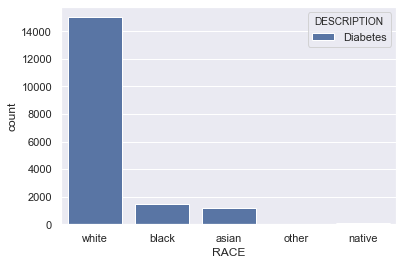

In [60]:
sns.set(style="darkgrid")
ax = sns.countplot(x="RACE", hue="DESCRIPTION", data=covid19_patients_df)

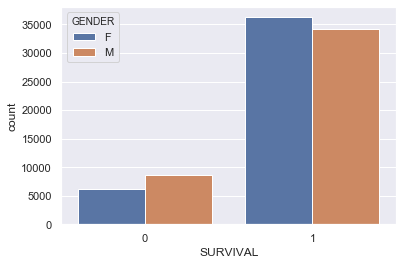

In [61]:
sns.countplot(x = 'SURVIVAL', hue = 'GENDER', data = covid19_patients_df)

In [62]:
covid19_patients_df.isnull().sum().sort_values(ascending = False)

DEATHDATE           70473
DESCRIPTION         67353
MARITAL              6604
DAYSHOSPITALIZED        0
AGE                     0
SURVIVAL                0
STATE                   0
CITY                    0
GENDER                  0
ETHNICITY               0
RACE                    0
BIRTHDATE               0
Id                      0
dtype: int64

In [63]:
covid19_patients_df.isnull().mean().sort_values(ascending = False)

DEATHDATE           0.827536
DESCRIPTION         0.790899
MARITAL             0.077548
DAYSHOSPITALIZED    0.000000
AGE                 0.000000
SURVIVAL            0.000000
STATE               0.000000
CITY                0.000000
GENDER              0.000000
ETHNICITY           0.000000
RACE                0.000000
BIRTHDATE           0.000000
Id                  0.000000
dtype: float64

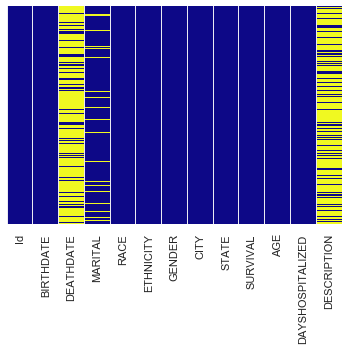

In [64]:
sns.heatmap(covid19_patients_df.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

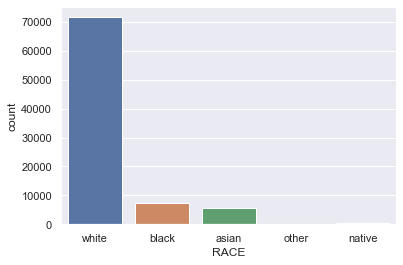

In [65]:
sns.countplot(covid19_patients_df['RACE'])

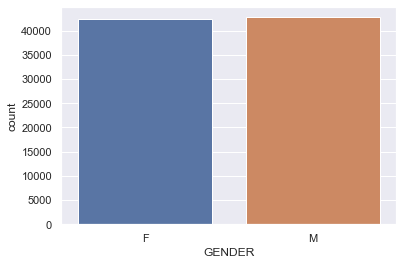

In [66]:
sns.countplot(covid19_patients_df['GENDER'])

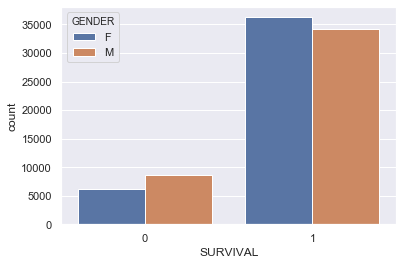

In [67]:
sns.countplot(x = 'SURVIVAL', hue = 'GENDER', data = covid19_patients_df)

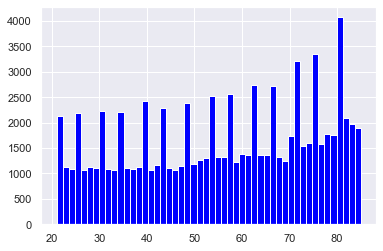

In [68]:
covid19_patients_df['AGE'].hist(bins = 50, color = 'blue')

In [69]:
covid19_patients_df.DESCRIPTION.value_counts()

Diabetes    17807
Name: DESCRIPTION, dtype: int64

In [70]:
covid19_patients_df.shape

(85160, 13)

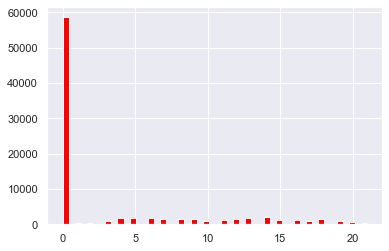

In [71]:
covid19_patients_df['DAYSHOSPITALIZED'].hist(bins = 50, color = 'red')

In [72]:
race_age_group = covid19_patients_df.groupby("RACE")["AGE"]

print(race_age_group.median())
print(race_age_group.mean())

RACE
asian     57
black     58
native    60
other     59
white     57
Name: AGE, dtype: int64
RACE
asian     55.346993
black     56.201788
native    57.790021
other     56.806452
white     55.848360
Name: AGE, dtype: float64


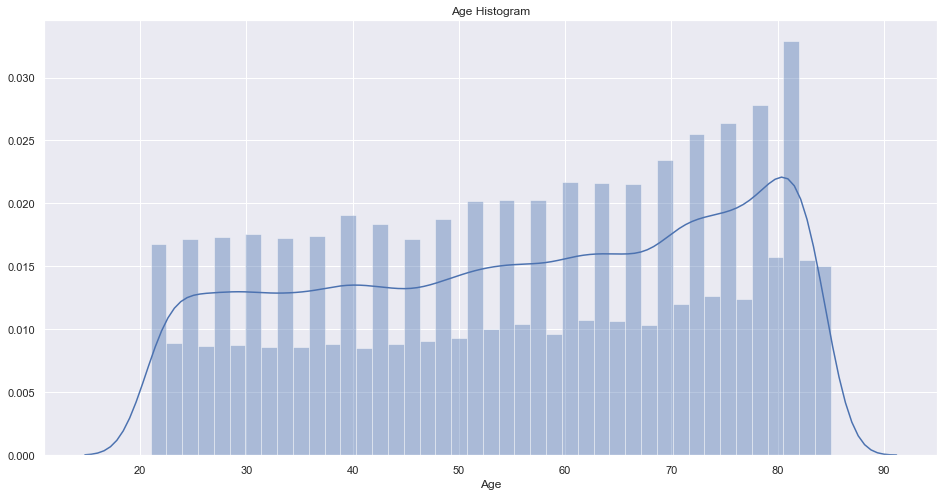

In [73]:
plt.figure(figsize = (16, 8))

sns.distplot(covid19_patients_df["AGE"])
plt.title("Age Histogram")
plt.xlabel("Age")
plt.show()

In [74]:
covid19_patients_df.isnull().sum().sort_values(ascending = False)

DEATHDATE           70473
DESCRIPTION         67353
MARITAL              6604
DAYSHOSPITALIZED        0
AGE                     0
SURVIVAL                0
STATE                   0
CITY                    0
GENDER                  0
ETHNICITY               0
RACE                    0
BIRTHDATE               0
Id                      0
dtype: int64

### Add column to covid19_patients_df to track patients who have Diabetes: '1' = Diabetes, '0' = Does Not have Diabetes

In [75]:
covid19_patients_df["DIABETES"] = covid19_patients_df["DESCRIPTION"].apply(lambda x: "0" if pd.isnull(x) else "1")

In [76]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 14 columns):
Id                  85160 non-null object
BIRTHDATE           85160 non-null object
DEATHDATE           14687 non-null object
MARITAL             78556 non-null object
RACE                85160 non-null object
ETHNICITY           85160 non-null object
GENDER              85160 non-null object
CITY                85160 non-null object
STATE               85160 non-null object
SURVIVAL            85160 non-null int8
AGE                 85160 non-null int64
DAYSHOSPITALIZED    85160 non-null float64
DESCRIPTION         17807 non-null object
DIABETES            85160 non-null object
dtypes: float64(1), int64(1), int8(1), object(11)
memory usage: 11.7+ MB


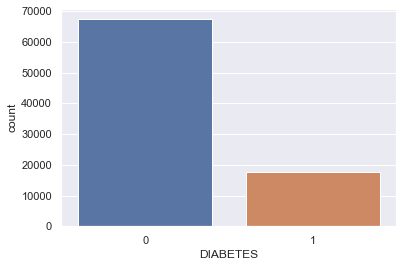

In [77]:
sns.countplot(covid19_patients_df['DIABETES'])

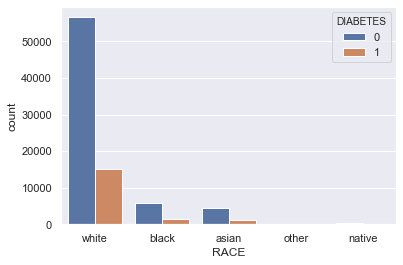

In [78]:
sns.countplot(x = 'RACE', hue = 'DIABETES', data = covid19_patients_df)

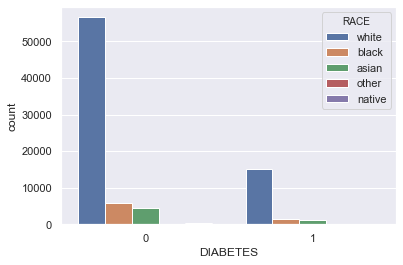

In [79]:
sns.countplot(x = 'DIABETES', hue = 'RACE', data = covid19_patients_df)

# Preparing dataframe for logistics model

In [80]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 14 columns):
Id                  85160 non-null object
BIRTHDATE           85160 non-null object
DEATHDATE           14687 non-null object
MARITAL             78556 non-null object
RACE                85160 non-null object
ETHNICITY           85160 non-null object
GENDER              85160 non-null object
CITY                85160 non-null object
STATE               85160 non-null object
SURVIVAL            85160 non-null int8
AGE                 85160 non-null int64
DAYSHOSPITALIZED    85160 non-null float64
DESCRIPTION         17807 non-null object
DIABETES            85160 non-null object
dtypes: float64(1), int64(1), int8(1), object(11)
memory usage: 11.7+ MB


In [81]:
# Convert 'GENDER' variable to integer form!
covid19_patients_df.loc[(covid19_patients_df.GENDER == "M"),'GENDER'] = 0
covid19_patients_df.loc[(covid19_patients_df.GENDER == "F"),'GENDER'] = 1

# Convert 'RACE' variable to integer form!
covid19_patients_df.loc[(covid19_patients_df.RACE == "white"),'RACE'] = 1
covid19_patients_df.loc[(covid19_patients_df.RACE == "black"),'RACE'] = 2
covid19_patients_df.loc[(covid19_patients_df.RACE == "asian"),'RACE'] = 3
covid19_patients_df.loc[(covid19_patients_df.RACE == "other"),'RACE'] = 4
covid19_patients_df.loc[(covid19_patients_df.RACE == "native"),'RACE'] = 5

In [82]:
covid19_patients_df['GENDER']

0        1
1        0
2        1
3        0
4        1
        ..
85155    0
85156    0
85157    0
85158    1
85159    0
Name: GENDER, Length: 85160, dtype: int64

In [83]:
covid19_patients_df['RACE']

0        1
1        1
2        1
3        2
4        1
        ..
85155    1
85156    1
85157    1
85158    1
85159    1
Name: RACE, Length: 85160, dtype: int64

In [84]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 14 columns):
Id                  85160 non-null object
BIRTHDATE           85160 non-null object
DEATHDATE           14687 non-null object
MARITAL             78556 non-null object
RACE                85160 non-null int64
ETHNICITY           85160 non-null object
GENDER              85160 non-null int64
CITY                85160 non-null object
STATE               85160 non-null object
SURVIVAL            85160 non-null int8
AGE                 85160 non-null int64
DAYSHOSPITALIZED    85160 non-null float64
DESCRIPTION         17807 non-null object
DIABETES            85160 non-null object
dtypes: float64(1), int64(3), int8(1), object(9)
memory usage: 11.7+ MB


In [85]:
# We'll drop the following features for now, but more to follow...
covid19_patients_df.drop(['MARITAL', 'DESCRIPTION','CITY','STATE'], axis = 1, inplace = True)

In [86]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 10 columns):
Id                  85160 non-null object
BIRTHDATE           85160 non-null object
DEATHDATE           14687 non-null object
RACE                85160 non-null int64
ETHNICITY           85160 non-null object
GENDER              85160 non-null int64
SURVIVAL            85160 non-null int8
AGE                 85160 non-null int64
DAYSHOSPITALIZED    85160 non-null float64
DIABETES            85160 non-null object
dtypes: float64(1), int64(3), int8(1), object(5)
memory usage: 9.1+ MB


In [87]:
# We'll also drop the following features
covid19_patients_df.drop(['Id', 'BIRTHDATE', 'DEATHDATE', 'ETHNICITY'], axis = 1, inplace = True)

# Running Logistics model based on the following columns

In [88]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 6 columns):
RACE                85160 non-null int64
GENDER              85160 non-null int64
SURVIVAL            85160 non-null int8
AGE                 85160 non-null int64
DAYSHOSPITALIZED    85160 non-null float64
DIABETES            85160 non-null object
dtypes: float64(1), int64(3), int8(1), object(1)
memory usage: 6.5+ MB


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(covid19_patients_df.drop(['SURVIVAL'], axis = 1), 
                                                    covid19_patients_df['SURVIVAL'], test_size = 0.4, 
                                                    random_state = 2)

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51096 entries, 57465 to 72173
Data columns (total 5 columns):
RACE                51096 non-null int64
GENDER              51096 non-null int64
AGE                 51096 non-null int64
DAYSHOSPITALIZED    51096 non-null float64
DIABETES            51096 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 2.3+ MB


In [91]:
X_train.shape

(51096, 5)

In [92]:
type(y_train)

pandas.core.series.Series

In [93]:
y_train

57465    1
21187    1
39621    1
25422    1
7441     1
        ..
33867    1
84434    0
31019    1
44566    0
72173    1
Name: SURVIVAL, Length: 51096, dtype: int8

In [94]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
# Predict!
predictions = logisticRegression.predict(X_test)

In [96]:
round(np.mean(predictions), 2)

0.97

In [97]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[  535  5319]
 [  399 27811]]


In [98]:
accuracy = (535 + 27811) / (535 + 5319 + 399 + 27811)
print('accuracy is: ' + str(round(accuracy, 2)))

accuracy is: 0.83


In [99]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34064 entries, 77515 to 25384
Data columns (total 5 columns):
RACE                34064 non-null int64
GENDER              34064 non-null int64
AGE                 34064 non-null int64
DAYSHOSPITALIZED    34064 non-null float64
DIABETES            34064 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ MB


In [101]:
logisticRegression.coef_

array([[ 0.00177021,  0.3943116 , -0.07205973, -0.02224753, -0.37774492]])

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.09      0.16      5854
           1       0.84      0.99      0.91     28210

    accuracy                           0.83     34064
   macro avg       0.71      0.54      0.53     34064
weighted avg       0.79      0.83      0.78     34064

